In [21]:
from plotnine import *
import pandas as pd
import numpy as np

In [22]:
time = "2024-03-14_14:51"
time = "2024-03-14_15:32"
time = "2024-03-14_17:26"
time = "2024-03-14_18:18"


# time = "2024-03-14_15:32"

df = pd.read_csv(f"/projects/genomic-ml/da2343/ml_project_2/kmeans/results/{time}_results.csv")


# remove where dist_measure is 2
# remove where future_candles is 5
# remove where n_clusters is 150 or 200
# remove where log_return_threshold is greater than 0.01
# remove where calmar_ratio_threshold is not 2

# df = df[df["dist_measure"] != 2]
# df = df[df["future_candles"] != 5]
# df = df[df["n_clusters"] != 150]
# df = df[df["n_clusters"] != 200]
# df = df[df["log_return_threshold"] <= 0.01]
# df = df[df["calmar_ratio_threshold"] == 2]

df

,window,train_sum_annualized_return,val_sum_annualized_return,val_sum_max_drawdown,val_avg_calmar_ratio,test_sum_annualized_return,test_sum_max_drawdown,test_avg_calmar_ratio,test_cumsum_annualized_return,train_size,test_size,random_state
0,0,1.767956,0.116891,0.044588,2.578126,-0.054952,0.078608,0.012438,-0.054952,19200,1920,10
1,1,2.239901,0.341281,0.072313,5.625617,0.046393,0.176576,0.906580,-0.008559,19200,1920,10
2,2,2.598640,0.050057,0.019494,2.645762,-0.069337,0.074064,-0.938262,-0.077897,19200,1920,10
3,3,2.191164,0.164753,0.032919,6.560184,-0.057088,0.178799,0.434127,-0.134985,19200,1920,10
4,4,2.191158,0.112771,0.014776,8.710806,-0.011850,0.019511,-0.409863,-0.146834,19200,1920,10
...,...,...,...,...,...,...,...,...,...,...,...,...
392,46,3.042760,0.231632,0.041090,12.941455,0.085495,0.075043,3.447313,0.196385,14400,1920,10
393,47,4.392954,0.307177,0.087385,5.532660,-0.128478,0.311068,0.432777,0.067907,14400,1920,10
394,48,2.678245,0.082676,0.020318,4.461818,0.045116,0.032289,1.861628,0.113022,14400,1920,10
395,49,1.352525,0.053481,0.008084,6.984260,-0.019204,0.051108,-0.390345,0.093819,14400,1920,10


/projects/genomic-ml/da2343/cs685/lib/python3.9/site-packages/plotnine/facets/facet.py:446: PlotnineWarning: If you need more space for the y-axis tick text use ... + theme(subplots_adjust={'hspace': 0.25}). Choose an appropriate value for 'hspace'


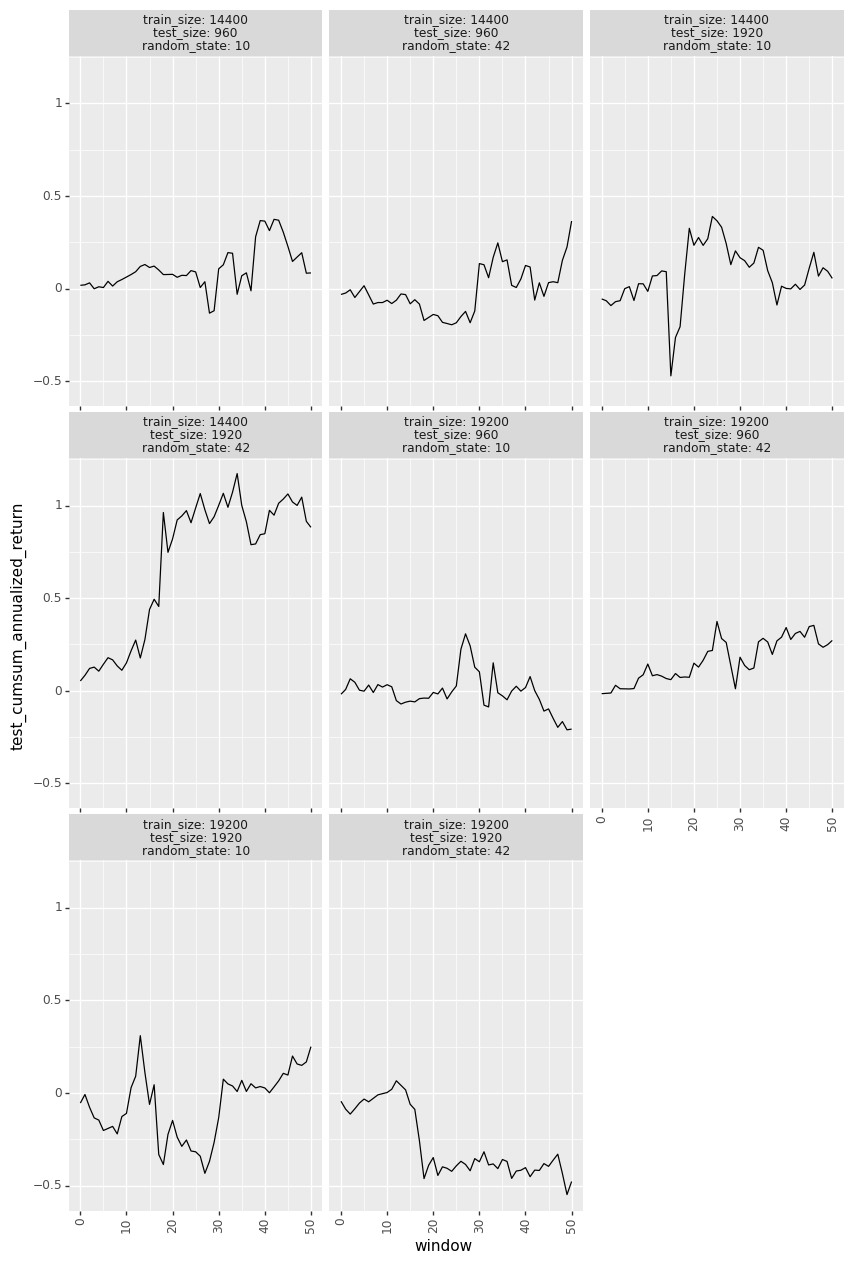

In [23]:
p = ggplot(df)
p = p + geom_line(aes(x="window", y="test_cumsum_annualized_return"))
p = p + facet_wrap("~train_size + test_size + random_state", scales="free_x", labeller="label_both")
p = p + theme(axis_text_x=element_text(angle=90), figure_size=(10, 15))
print(p)